In [144]:
import numpy as np
import math as mt
import matplotlib as mplt
import matplotlib.pyplot as plt
from random import random
from scipy import special
import scipy.stats as stats
from scipy.special import gammainc

We need a function that creates the circle thingy


In [146]:
def sample(center,radius,circle):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(circle, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(circle,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

And now, the circle thingy

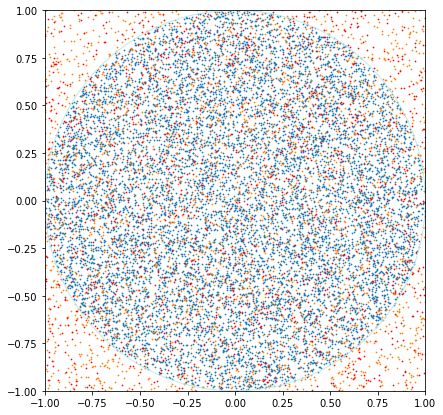

In [147]:
fig1 = plt.figure(1, figsize=(7,7))
ax1 = fig1.gca()
center = np.array([0,0])
radius = 1
p = sample(center,radius,10000)
p2 = sample(center,radius*2,10000)
p3 = sample(center,radius*3,10000)
ax1.scatter(p[:,0],p[:,1],s=0.5)
ax1.scatter(p2[:,0],p2[:,1],s=0.5)
ax1.scatter(p3[:,0],p3[:,1],s=0.5, color="red")
# Wanna see the circle edge? hihi
ax1.add_artist(plt.Circle(center,radius,fill=False,color='#beebe9'))
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_aspect('equal')

And Finally! The sphere thingy, it was easiest than I thought

In [168]:
n = 5000
radius
posx = np.zeros(n)
posy = np.zeros(n)
posz = np.zeros(n)

index = 0
while index < n:
    x = np.random.rand(1) * 2 * radius - radius
    y = np.random.rand(1) * 2 * radius - radius
    z = np.random.rand(1) * 2 * radius-radius
    if x**2 + y**2 + z**2 <= radius**2:
        posx[index] = x
        posy[index] = y
        posz[index] = z
        index += 1

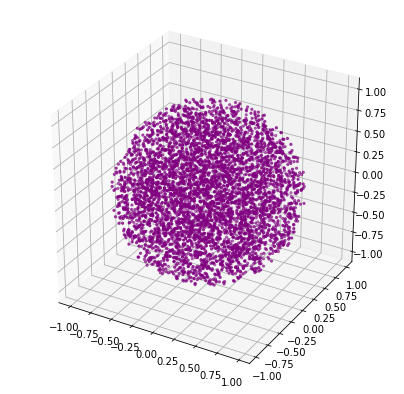

In [184]:
fig = plt.figure(figsize = (7,7))
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(posx, posy, posz, "r", marker='.', color="purple")
d=1

# Exercise 1


Generate a normal distribution, center at x=0 and y=5

In [70]:
N_points = 100000
n_bins = 200
x = np.random.randn(N_points)
y = .4 * x + np.random.randn(100000) + 5

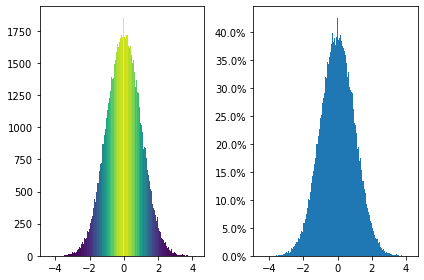

In [71]:
fig, axs = plt.subplots(1, 2, tight_layout=True)
N, bins, patches = axs[0].hist(x, bins=n_bins)
fracs = N / N.max()
norm = mplt.colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[1].hist(x, bins=n_bins, density=True)
axs[1].yaxis.set_major_formatter(mplt.ticker.PercentFormatter(xmax=1))
plt.show()

Let's create the cumulative distribution functions, both, the normal one and the inverse one

In [72]:
def cdf_inv(y, mu, sigma):
    return special.erfinv(2*y-1)*sigma*2**0.5+mu

def cdf(y, mu, sigma):
    return 0.5*(1+special.erf((y-mu)/sigma*(2**0.5)))

# Generating data
data = np.sort(np.random.rand(200000))

[]

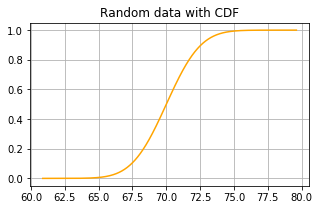

In [73]:
fig, ax = plt.subplots(figsize = (5,3))

ax.plot(cdf_inv(data, 70, 2), data,  color = "orange")
ax.grid()
ax.set_title("Random data with CDF")
plt.plot()

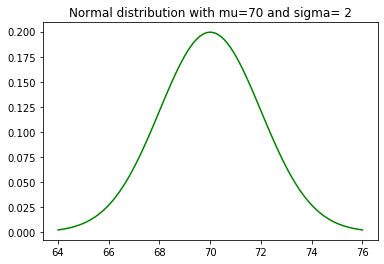

In [77]:
mu = 70
sigma = 2
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color="Green")
plt.title("Normal distribution with mu=70 and sigma= 2")
plt.show()

# Exercise 2

## Poisson

In [92]:
from scipy.stats import poisson

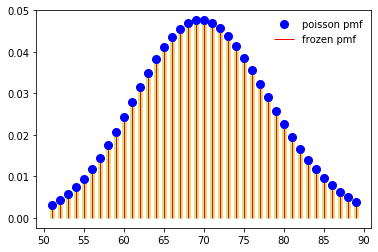

In [112]:
fig, ax = plt.subplots(1, 1)
mu = 70
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='y', lw=5, alpha=0.5)
rv = poisson(mu)
ax.vlines(x, 0, rv.pmf(x), colors='red', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

*No le entendí :(*

# Exercise 3

In [140]:
from scipy.special import gammainc

We need a function that creates the circle thingy

In [142]:
def sample(center,radius,circle):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(circle, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(circle,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

And now, the circle thingy

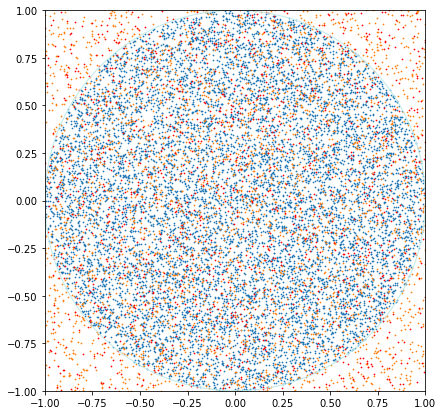

In [143]:
fig1 = plt.figure(1, figsize=(7,7))
ax1 = fig1.gca()
center = np.array([0,0])
radius = 1
p = sample(center,radius,10000)
p2 = sample(center,radius*2,10000)
p3 = sample(center,radius*3,10000)
ax1.scatter(p[:,0],p[:,1],s=0.5)
ax1.scatter(p2[:,0],p2[:,1],s=0.5)
ax1.scatter(p3[:,0],p3[:,1],s=0.5, color="red")
# Wanna see the circle edge? hihi
ax1.add_artist(plt.Circle(center,radius,fill=False,color='#beebe9'))
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)
ax1.set_aspect('equal')